In [2]:
import pandas as pd
import matplotlib.pyplot as plt


In [4]:
train_df = pd.read_csv('./data/train_set.csv', sep='\t', nrows=15000)
test_df = pd.read_csv('./data/test_a.csv', sep='\t')
train_df.head()
train_df.tail()

,label,text
14995,5,1822 6040 5744 5310 4578 4407 6242 2313 3466 2...
14996,9,88 7400 7539 4516 6122 290 6831 465 1647 6293 ...
14997,0,2597 7160 2282 1407 4403 4516 2873 4597 7037 5...
14998,0,2400 4411 4721 3289 5787 5096 4464 6250 1324 6...
14999,8,4188 5778 5296 5640 2835 648 6122 2489 2923 39...


In [24]:
test_df = pd.read_csv('./data/test_a.csv', sep='\t')
test_df.tail()

,text
49995,3725 4498 2282 1647 6293 4245 4498 3615 1141 2...
49996,4811 465 3800 1394 3038 2376 2327 5165 3070 57...
49997,5338 1952 3117 4109 299 6656 6654 3792 6831 21...
49998,893 3469 5775 584 2490 4223 6569 6663 2124 168...
49999,2400 4409 4412 2210 5122 4464 7186 2465 1327 9...


In [5]:
%matplotlib inline
%config InlineBackend.figure_format = 'svg'
train_df['text_len'] = train_df['text'].apply(lambda x: len(x.split()))
print(train_df['text_len'].describe())

count    15000.000000
mean       905.327867
std        993.106635
min          2.000000
25%        373.000000
50%        672.000000
75%       1125.000000
max      44665.000000
Name: text_len, dtype: float64


Text(0.5, 1.0, 'Histogram of char count')

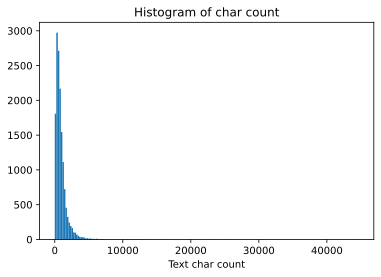

In [6]:
_ = plt.hist(train_df['text_len'], bins=200)
plt.xlabel('Text char count')
plt.title("Histogram of char count")

Text(0.5, 0, 'category')

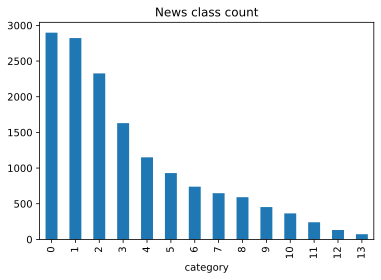

In [7]:
train_df['label'].value_counts().plot(kind='bar')
plt.title('News class count')
plt.xlabel("category")

In [8]:
from collections import Counter
all_lines = ' '.join(list(train_df['text']))
word_count = Counter(all_lines.split())

word_count = sorted(word_count.items(), key=lambda d:d[1], reverse = True)

print(len(word_count))

print(word_count[0:2])

print(word_count[-1])

5515
[('3750', 557540), ('648', 367423)]
('2034', 1)


In [9]:
train_df['text_unique'] = train_df['text'].apply(lambda x: ' '.join(list(set(x.split()))))
all_lines = ' '.join(list(train_df['text_unique']))
word_count = Counter(all_lines.split())
word_count = sorted(word_count.items(), key=lambda d:int(d[1]), reverse = True)

print(word_count[0:10])


[('3750', 14866), ('900', 14840), ('648', 14415), ('6122', 13215), ('2465', 13204), ('7399', 13147), ('4811', 12645), ('4464', 12591), ('1699', 12369), ('299', 12251)]


In [14]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import RidgeClassifier, LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import f1_score

In [21]:
vectorizer = TfidfVectorizer(max_features=3000)
X = vectorizer.fit_transform(list(train_df['text'])).toarray()
y = list(train_df['label'])

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

test = vectorizer.transform(list(test_df['text'])).toarray()


In [22]:
clf = RidgeClassifier(random_state=0)
clf.fit(X_train, y_train)
# clf.predict(X_test)
clf.score(X_test, y_test)

0.902